<a href="https://colab.research.google.com/github/furlancad/Estudo-PMF/blob/main/An%C3%A1lise_de_A%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno

In [50]:
acao = 'CMIG4'

In [51]:
acao + '.SA'

'CMIG4.SA'

In [52]:
acao = yf.download('CMIG4.SA', period='5y', auto_adjust=True, actions=True)

[*********************100%%**********************]  1 of 1 completed


In [53]:
acao.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,1240.000000,1240.000000,1240.000000,1240.000000,1.240000e+03,1240.000000,1240.000000
mean,7.814029,7.925274,7.695256,7.810852,1.346269e+07,0.003632,0.002787
std,2.338071,2.355253,2.318591,2.336257,6.767439e+06,0.035012,0.056872
min,3.562485,3.781996,3.448156,3.621935,0.000000e+00,0.000000,0.000000
25%,6.071926,6.155983,5.968817,6.066810,8.934240e+06,0.000000,0.000000
50%,7.042191,7.120542,6.958834,7.059688,1.177686e+07,0.000000,0.000000
75%,9.858439,9.996516,9.688168,9.841010,1.638948e+07,0.000000,0.000000
max,12.897855,13.094919,12.819030,12.956974,6.710943e+07,0.597418,1.300000


In [54]:
acao.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1240 entries, 2018-10-29 to 2023-10-27
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1240 non-null   float64
 1   High          1240 non-null   float64
 2   Low           1240 non-null   float64
 3   Close         1240 non-null   float64
 4   Volume        1240 non-null   int64  
 5   Dividends     1240 non-null   float64
 6   Stock Splits  1240 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 77.5 KB


In [55]:
acao.index

DatetimeIndex(['2018-10-29', '2018-10-30', '2018-10-31', '2018-11-01',
               '2018-11-05', '2018-11-06', '2018-11-07', '2018-11-08',
               '2018-11-09', '2018-11-12',
               ...
               '2023-10-16', '2023-10-17', '2023-10-18', '2023-10-19',
               '2023-10-20', '2023-10-23', '2023-10-24', '2023-10-25',
               '2023-10-26', '2023-10-27'],
              dtype='datetime64[ns]', name='Date', length=1240, freq=None)

In [56]:
acao.shape

(1240, 7)

In [57]:
acao.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

In [58]:
acao.isna().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

<Axes: >

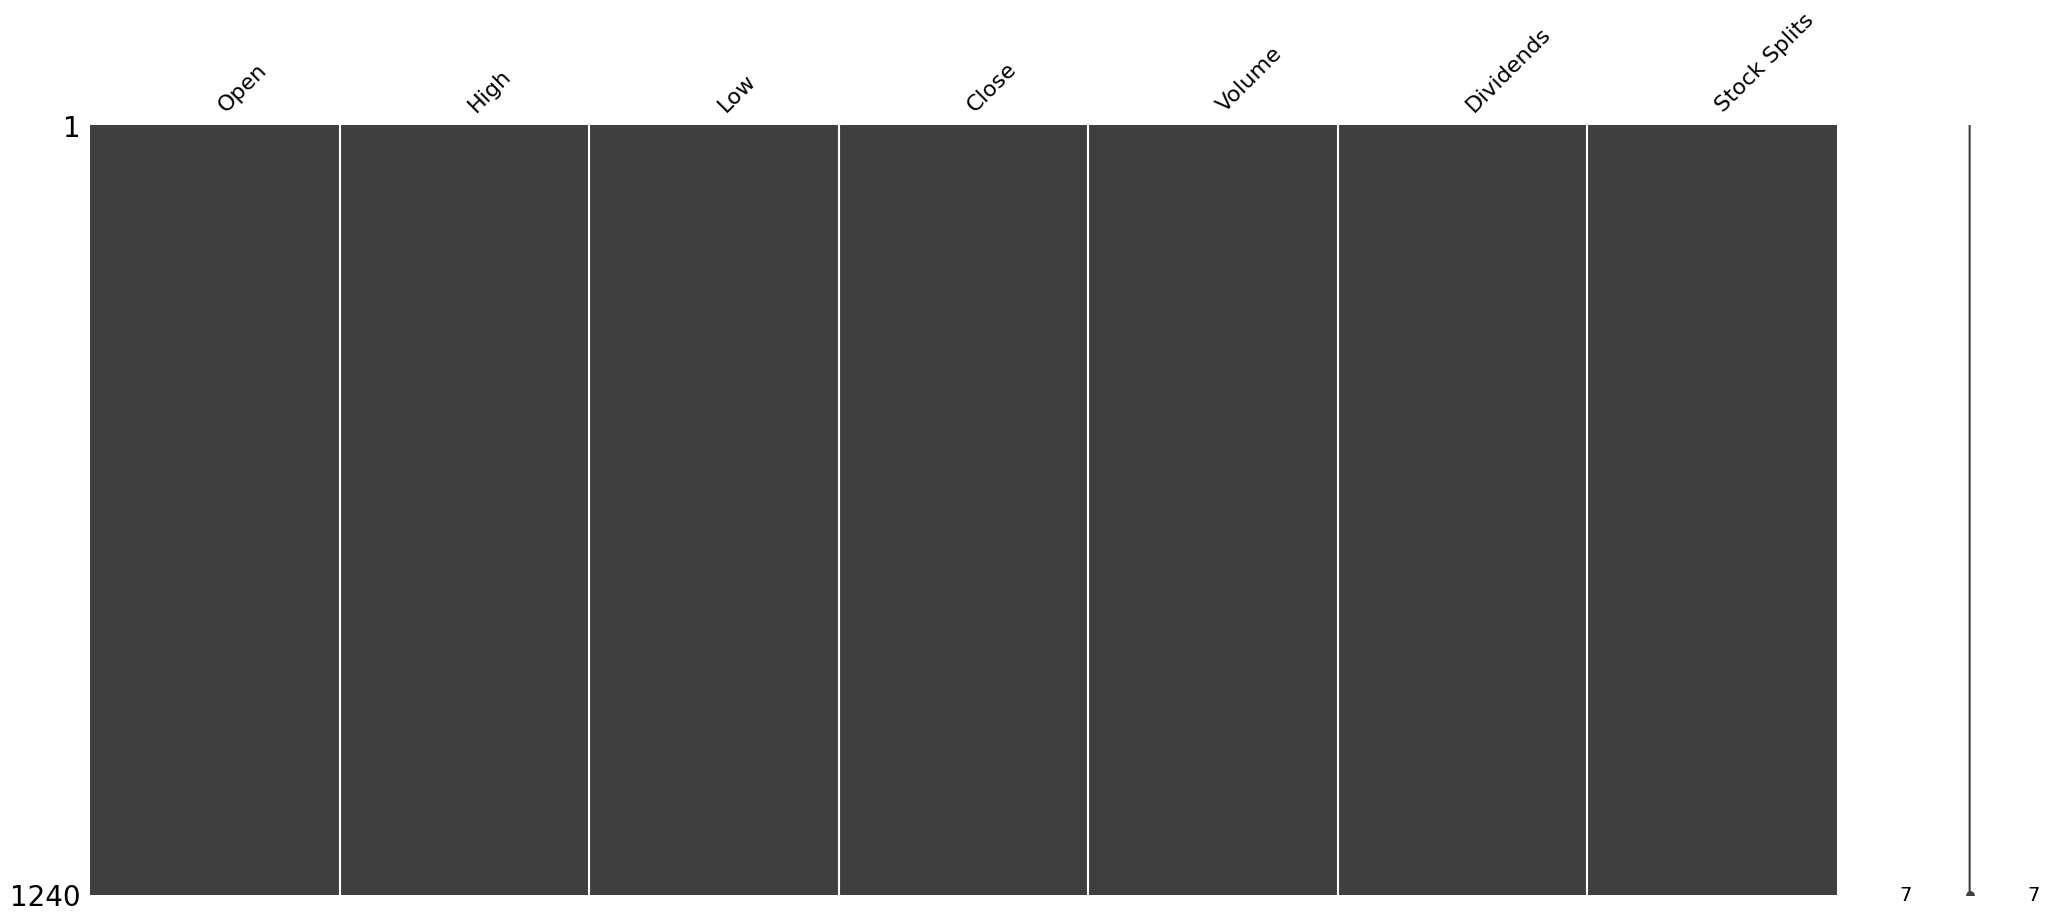

In [59]:
msno.matrix(acao)

<Axes: >

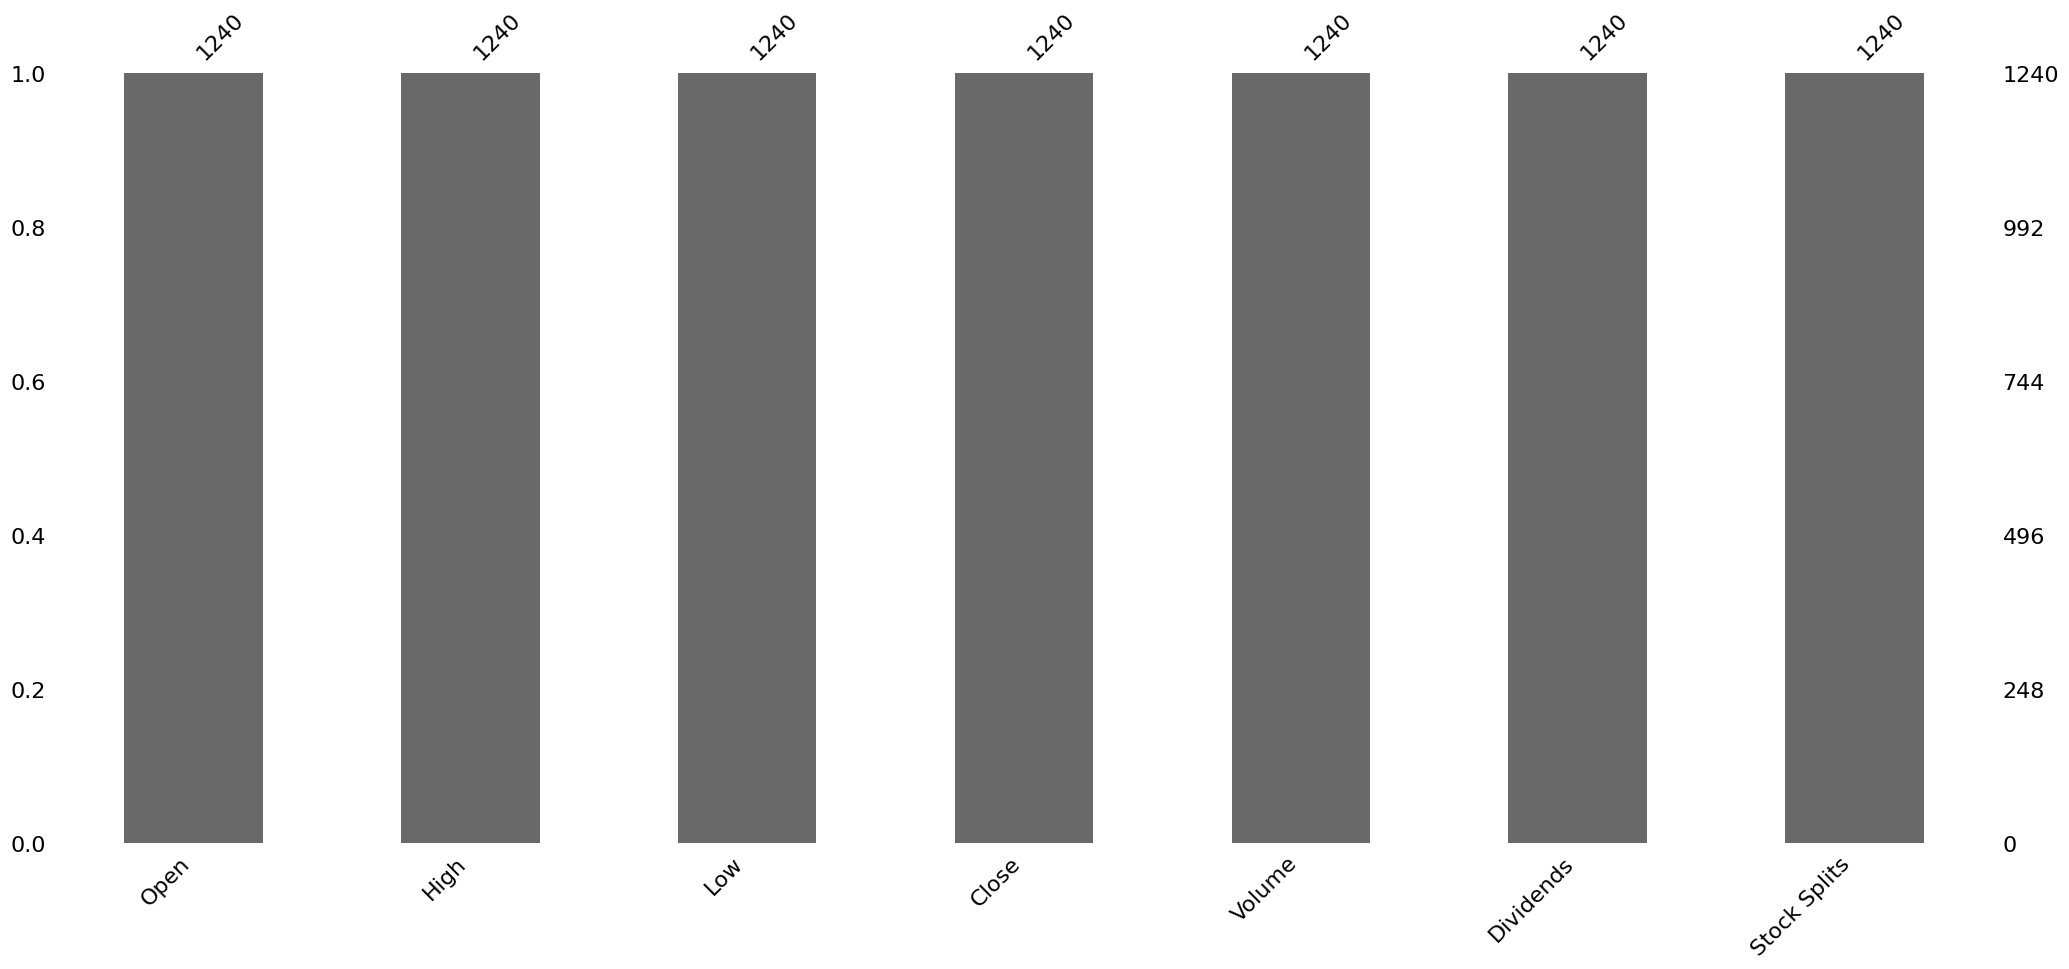

In [60]:
msno.bar(acao)

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


<Axes: >

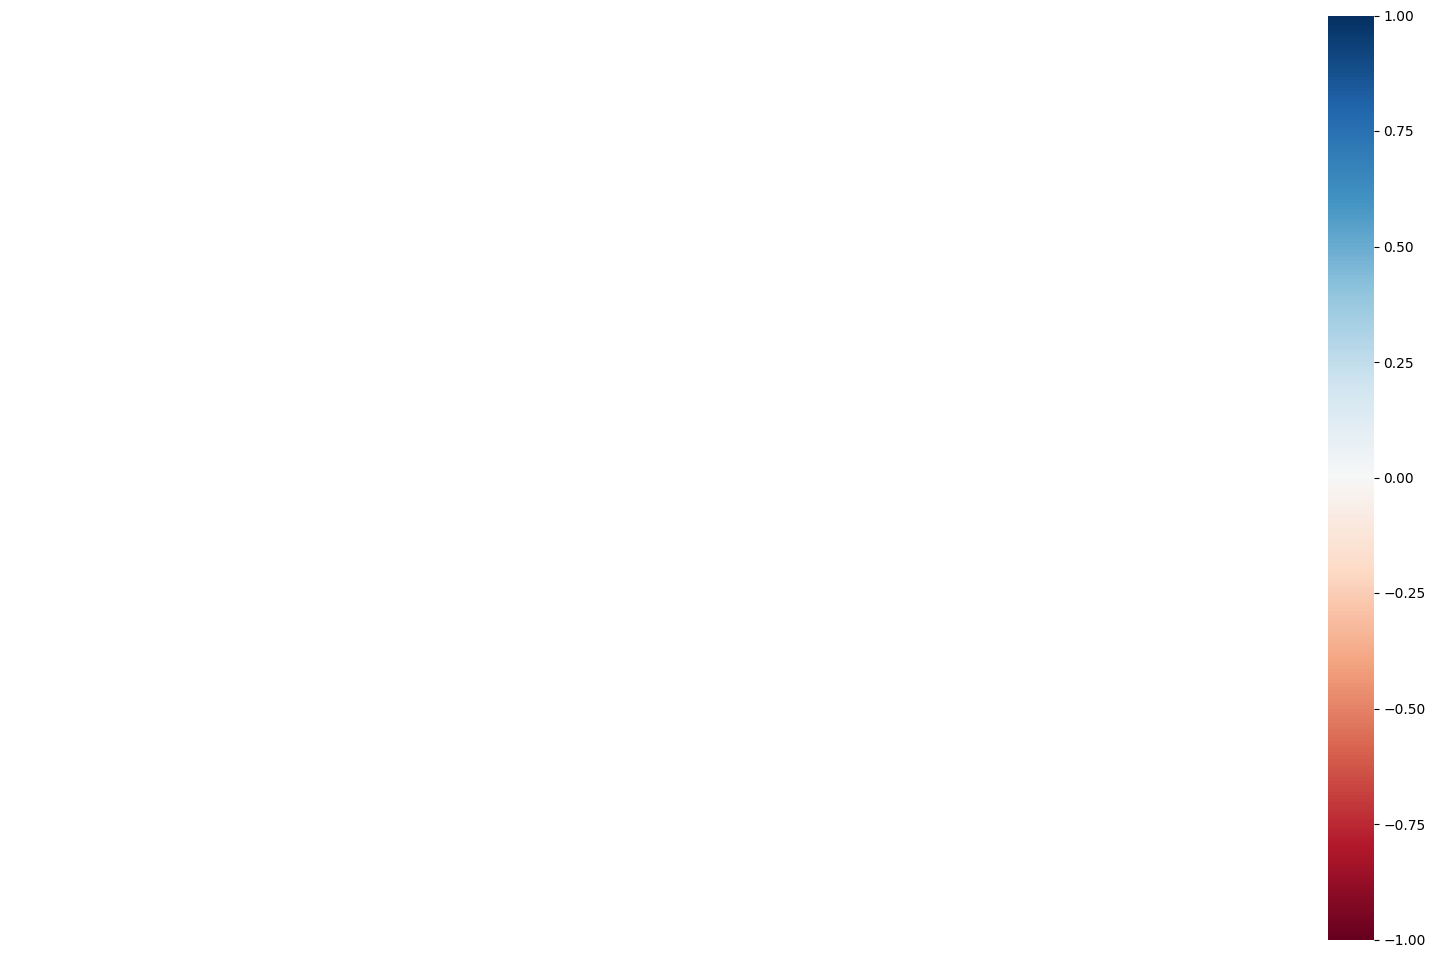

In [61]:
msno.heatmap(acao)

In [62]:
acao = acao.asfreq('D')
acao

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-10-29,4.905153,4.969581,4.814953,4.892267,67109427.0,0.0,0.0
2018-10-30,4.892267,4.926629,4.664620,4.836430,50919894.0,0.0,0.0
2018-10-31,4.857906,4.892267,4.707572,4.737639,26771033.0,0.0,0.0
2018-11-01,4.767705,4.866496,4.703276,4.720458,33154581.0,0.0,0.0
2018-11-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2023-10-23,11.810000,11.990000,11.750000,11.910000,6187900.0,0.0,0.0
2023-10-24,12.040000,12.040000,11.850000,11.930000,4901000.0,0.0,0.0
2023-10-25,11.930000,11.990000,11.850000,11.850000,5503800.0,0.0,0.0


In [63]:
acao.fillna(method='ffill', inplace=True)
acao

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-10-29,4.905153,4.969581,4.814953,4.892267,67109427.0,0.0,0.0
2018-10-30,4.892267,4.926629,4.664620,4.836430,50919894.0,0.0,0.0
2018-10-31,4.857906,4.892267,4.707572,4.737639,26771033.0,0.0,0.0
2018-11-01,4.767705,4.866496,4.703276,4.720458,33154581.0,0.0,0.0
2018-11-02,4.767705,4.866496,4.703276,4.720458,33154581.0,0.0,0.0
...,...,...,...,...,...,...,...
2023-10-23,11.810000,11.990000,11.750000,11.910000,6187900.0,0.0,0.0
2023-10-24,12.040000,12.040000,11.850000,11.930000,4901000.0,0.0,0.0
2023-10-25,11.930000,11.990000,11.850000,11.850000,5503800.0,0.0,0.0


In [65]:
acao['Rentabilidade'] = acao['Close'].pct_change()*100
acao

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Rentabilidade
Date,,,,,,,,
2018-10-29,4.905153,4.969581,4.814953,4.892267,67109427.0,0.0,0.0,NaN
2018-10-30,4.892267,4.926629,4.664620,4.836430,50919894.0,0.0,0.0,-1.141345
2018-10-31,4.857906,4.892267,4.707572,4.737639,26771033.0,0.0,0.0,-2.042636
2018-11-01,4.767705,4.866496,4.703276,4.720458,33154581.0,0.0,0.0,-0.362647
2018-11-02,4.767705,4.866496,4.703276,4.720458,33154581.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...
2023-10-23,11.810000,11.990000,11.750000,11.910000,6187900.0,0.0,0.0,0.846735
2023-10-24,12.040000,12.040000,11.850000,11.930000,4901000.0,0.0,0.0,0.167930
2023-10-25,11.930000,11.990000,11.850000,11.850000,5503800.0,0.0,0.0,-0.670578


In [66]:
moving_average_50 = acao.rolling(50).mean()
moving_average_50

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Rentabilidade
Date,,,,,,,,
2018-10-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-10-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-11-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2023-10-23,12.330695,12.440752,12.174561,12.287971,9181186.0,0.003799,0.0,-0.055120
2023-10-24,12.325559,12.434237,12.167793,12.281817,9226096.0,0.003799,0.0,-0.045341
2023-10-25,12.320193,12.427706,12.163192,12.277019,9219800.0,0.003799,0.0,-0.034598


In [67]:
moving_average_200 = acao.iloc[:,0:4].rolling(200).mean()
moving_average_200

,Open,High,Low,Close
Date,,,,
2018-10-29,NaN,NaN,NaN,NaN
2018-10-30,NaN,NaN,NaN,NaN
2018-10-31,NaN,NaN,NaN,NaN
2018-11-01,NaN,NaN,NaN,NaN
2018-11-02,NaN,NaN,NaN,NaN
...,...,...,...,...
2023-10-23,12.118529,12.244793,11.970263,12.108274
2023-10-24,12.122659,12.248058,11.973587,12.111710
2023-10-25,12.126239,12.251072,11.976912,12.114746


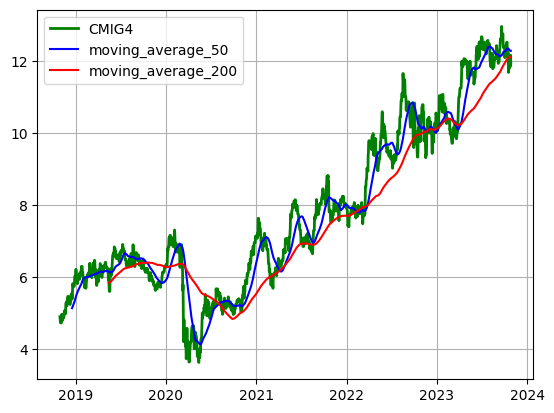

In [68]:
plt.plot(acao['Close'].loc['2016-01-01':], 'g-', label='line 1', linewidth=2)
plt.plot(acao.Close.rolling(50).mean().loc['2016-01-01':], 'b-', label='line 2',)
plt.plot(acao.Close.rolling(200).mean().loc['2016-01-01':], 'r-', label='line 2',)

plt.legend(["CMIG4", "moving_average_50", 'moving_average_200'])
plt.grid(True)

# Salve o gráfico como uma imagem
fig = plt.gcf()
fig.savefig("image.png")